In [19]:
%run ../__init__.ipynb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
fp_ifresid_ = workpath('23.12.06_ppi_reselect/af2-models-split-ifresid.tsv.gz')
df_models = pd.read_csv(workpath('24.05.17_suppl/suppl_ppi_models.tsv.gz'), sep='\t', keep_default_na=False).query('sources != "negatome"')#\
#.merge(pd.read_csv(fp_ifresid_, sep='\t', usecols=['interaction_id', 'ifresid1_5', 'ifresid2_5'], nrows=None, keep_default_na=False), on='interaction_id', how='left')
df_models

,interaction_id,pdockq,uniprot_id1,uniprot_id2,chain1,chain2,ifresid1,ifresid2,sources,n_references,pdb
0,O75106_Q16853,0.74,O75106,Q16853,A,B,"R169,A203,A204,V205,H206,L212,R213,W220,N226,I...","P39,V209,L218,Q219,W226,N232,I233,S234,G235,A2...","BioGRID,humap,intact,string",2,O75106/O75106_Q16853.pdb
1,Q15118_Q15118,0.73,Q15118,Q15118,A,B,"S53,P54,P56,Y179,D182,R183,M186,L255,A257,H304...","S53,P54,P56,Y179,D182,R183,M186,E253,L255,A257...","BioGRID,intact",2,Q15118/Q15118_Q15118.pdb
2,P11142_Q92598,0.73,P11142,Q92598,A,B,"K25,E27,I28,A30,N31,D32,Q33,G34,R36,E48,L50,D5...","R19,A27,N28,E29,F30,S31,R33,N54,T58,Y184,R261,...","BioGRID,corum,humap,intact,otar,string,xlinkdb",9,P11142/P11142_Q92598.pdb
3,Q13326_Q16585,0.73,Q13326,Q16585,A,B,"V40,L41,L43,L44,L47,V48,N50,L51,T54,I55,L58,F6...","V68,I69,L71,L72,L75,A76,I78,N79,I82,I86,M100,F...","corum,otar,string",0,Q13326/Q13326_Q16585.pdb
4,Q13326_Q92629,0.73,Q13326,Q92629,A,B,"K33,L36,Y37,V40,L41,L43,L44,L47,V48,N50,L51,T5...","R30,K31,C33,L34,F37,V38,L40,L41,L44,I45,V47,N4...","corum,string",0,Q13326/Q13326_Q92629.pdb
...,...,...,...,...,...,...,...,...,...,...,...
486094,P23193_Q92889,0.00,,,,,,,otar,0,
486095,P23193_Q92541,0.00,,,,,,,"BioGRID,intact,otar,string",1,
486096,P23193_Q8WX92,0.00,,,,,,,"otar,string",0,
486097,P23193_Q8WVC0,0.00,,,,,,,"BioGRID,intact,otar,string",2,


In [21]:
# List of bait-interactor pairs, one entry per "interaction matrix"; one entry for homo-dimers & 
cols_ = ['bait_id', 'bait_chain', 'bait_ifresid', 'interactor_id', 'interactor_chain', 'interactor_ifresid', 'pdockq', 'interaction_id', 'pdb']
q_ne_ = 'uniprot_id1 != uniprot_id2'
q_eq_ = 'uniprot_id1 == uniprot_id2'
c_12_ = {'uniprot_id1': 'bait_id', 'chain1': 'bait_chain', 'ifresid1': 'bait_ifresid', 'uniprot_id2': 'interactor_id', 'chain2': 'interactor_chain', 'ifresid2': 'interactor_ifresid'}
c_21_ = {'uniprot_id2': 'bait_id', 'chain2': 'bait_chain', 'ifresid2': 'bait_ifresid', 'uniprot_id1': 'interactor_id', 'chain1': 'interactor_chain', 'ifresid1': 'interactor_ifresid'}
df_interactors = pd.concat([
    df_models.query(q_ne_).rename(c_12_, axis=1)[cols_],
    df_models.query(q_eq_).rename(c_12_, axis=1)[cols_],
    df_models.query(q_ne_).rename(c_21_, axis=1)[cols_],
], axis=0)
df_interactors

,bait_id,bait_chain,bait_ifresid,interactor_id,interactor_chain,interactor_ifresid,pdockq,interaction_id,pdb
0,O75106,A,"R169,A203,A204,V205,H206,L212,R213,W220,N226,I...",Q16853,B,"P39,V209,L218,Q219,W226,N232,I233,S234,G235,A2...",0.74,O75106_Q16853,O75106/O75106_Q16853.pdb
2,P11142,A,"K25,E27,I28,A30,N31,D32,Q33,G34,R36,E48,L50,D5...",Q92598,B,"R19,A27,N28,E29,F30,S31,R33,N54,T58,Y184,R261,...",0.73,P11142_Q92598,P11142/P11142_Q92598.pdb
3,Q13326,A,"V40,L41,L43,L44,L47,V48,N50,L51,T54,I55,L58,F6...",Q16585,B,"V68,I69,L71,L72,L75,A76,I78,N79,I82,I86,M100,F...",0.73,Q13326_Q16585,Q13326/Q13326_Q16585.pdb
4,Q13326,A,"K33,L36,Y37,V40,L41,L43,L44,L47,V48,N50,L51,T5...",Q92629,B,"R30,K31,C33,L34,F37,V38,L40,L41,L44,I45,V47,N4...",0.73,Q13326_Q92629,Q13326/Q13326_Q92629.pdb
5,Q13330,A,"R7,Y11,R26,F45,L110,V128,T129,L130,E135,S136,Y...",Q13547,B,"Y14,G20,N21,Y22,Y23,Q26,K31,H33,R36,H39,N40,L4...",0.73,Q13330_Q13547,Q13330/Q13330_Q13547.pdb
...,...,...,...,...,...,...,...,...,...
206122,Q8IUQ4,B,"Q56,P78,G80",O43164,A,"P635,I636,C638",0.10,O43164_Q8IUQ4,O43164/O43164_Q8IUQ4.pdb
206123,Q9UNX3,B,,P63173,A,,0.10,P63173_Q9UNX3,P63173/P63173_Q9UNX3.pdb
206124,Q9NRY5,B,,O95352,A,,0.10,O95352_Q9NRY5,O95352/O95352_Q9NRY5.pdb
206125,P62829,B,,P60468,A,,0.10,P60468_P62829,P60468/P60468_P62829.pdb


/cluster/project/beltrao/jjaenes/software/miniconda3/envs/af2genomics-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


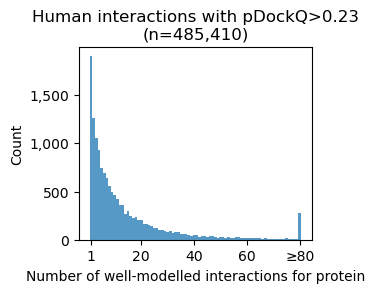

In [22]:
pdockq_ = .23
data_ = df_interactors.query('pdockq > @pdockq_').groupby('bait_id').size().to_frame(name='n_interactors')
max_ = 80
data_['n_interactors_capped'] = data_['n_interactors'].map(lambda x: int(min(x, max_)))
plt.figure(figsize=(3, 2.5))
sns.histplot(data_, x='n_interactors_capped', discrete=True, edgecolor='none')
plt.gca().set_title(f'Human interactions with pDockQ>{pdockq_}\n(n={uf(len(df_models))})')
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda val, pos: f'{int(val):,}'))
plt.gca().set_xlabel('Number of well-modelled interactions for protein')
plt.gca().set_ylabel('Count')
plt.gca().set_xticks([1, 20, 40, 60, 80])
plt.gca().set_xticklabels(['1', '20', '40', '60', '≥80'])
plt.savefig('n_interactors_.svg', bbox_inches='tight', transparent=True)

In [23]:
# df_interfaces: summary of interactions per "bait" protein
#data_['sources'] = data_['sources'].map(lambda s: set(s.split(',')))
pdockq_ = .5
df_interfaces = df_interactors.query('pdockq > @pdockq_').groupby('bait_id').agg(
    interactor_id = ('interactor_id', lambda interactor_id: ','.join(sorted(interactor_id))),
    n_interactors = ('interactor_id', lambda x: len(x)),
    bait_ifresid = ('bait_ifresid', lambda l: set([int(r[1:]) for r in flatten([s.split(',') for s in l if s != ''])])),
).reset_index().sort_values('n_interactors', ascending=False)
printlen(df_interfaces, 'interfaces')
df_interfaces = df_interfaces.sort_values('n_interactors', ascending=False).query('n_interactors >= 5')#.sample(n=100, random_state=RANDOM_SEED)
printlen(df_interfaces, 'after selecting for >=5 interactors')

10,312 interfaces
3,113 after selecting for >=5 interactors


In [24]:
#df_models.query('protein1 == "P31146" | protein2 == "P31146"').sort_values('pdockq', ascending=False)
#df_interfaces.query('bait_id == "O15270"')

load /cluster/work/beltrao/jjaenes/23.12.06_ppi_reselect/af2-models-split-trim_bf/P11021/P11021_Q9Y4L1.pdb
load /cluster/work/beltrao/jjaenes/23.12.06_ppi_reselect/af2-models-split-trim_bf/P11021/P11021_P14649.pdb
load /cluster/work/beltrao/jjaenes/23.12.06_ppi_reselect/af2-models-split-trim_bf/P11021/P11021_Q9BTY2.pdb


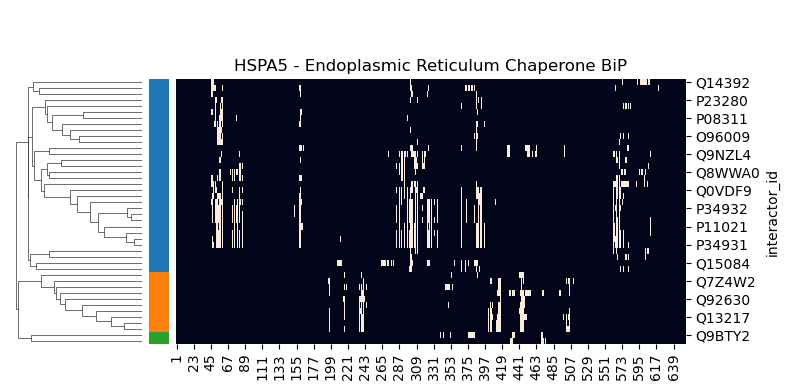

In [25]:
# Investigate individual examples..
# Cluster single example
l_examples = [
    'P11021', # HSPA5, fig2
    #'P31146', # CORO1A, fig5
    #'P11362', # FGFR1, fig5 - no high-quality models?
    #'P06493', # Mikko
    #'O15270', # Review Fig 2
]
#for uniprot_id in l_examples:
uniprot_id = 'P11021'#l_examples[-1]
bait_ = SharedInterfaceAnalysis(df_interactors.query('pdockq > .5 & bait_id == @uniprot_id'))
bait_.build_matrix()
bait_.linkage(t=.95)
bait_.clustermap(title='HSPA5 - Endoplasmic Reticulum Chaperone BiP')
bait_.to_pymol(f'interface_clusters_{uniprot_id}.pse')

In [26]:
# Cluster subset, plot distribution
def clusters_(ir):
    i, r = ir
    uniprot_id_bait = r.bait_id
    #pse_ = workpath(f'24.01.22_interface_clusters/{uniprot_id_bait}.pse')
    #svg_ = workpath(f'24.01.22_interface_clusters/{uniprot_id_bait}.svg')
    pse_ = f'interface_clusters/{uniprot_id_bait}.pse'
    svg_ = f'interface_clusters/{uniprot_id_bait}.svg'
    bait_ = SharedInterfaceAnalysis(df_interactors.query('pdockq >= .5 & bait_id == @uniprot_id_bait'))
    if len(bait_.df_interactors) >= 2:
        bait_.build_matrix()
        bait_.linkage(t=.95)
        #bait_.clustermap(fname=svg_)
        #bait_.to_pymol(fname=pse_)
        #print(df_interactors)
        #return len(bait_.df_interactors['labels'].value_counts())
        return bait_.df_interactors[['bait_id', 'interactor_id', 'labels']].rename({'labels': 'bait_cluster_id'}, axis=1)
    else:
        return pd.DataFrame()

#df_ifclusters = pd.concat([ clusters_(i, r) for i, r in df_interfaces.head(20).iterrows() ], axis=0).sort_values(['bait_id', 'bait_cluster_id'])
df_ifclusters = pd.concat(tqdm.contrib.concurrent.process_map(clusters_, df_interfaces.iterrows(), max_workers=slurm_ntasks()), axis=0)
#df_ifclusters.to_csv('interface_clusters.tsv', sep='\t', index=False, header=True)

0it [00:00, ?it/s]

In [27]:
def stats_(df_):
    frac = df_['bait_cluster_id'].value_counts().values / len(df_)
    frac1 = frac[0]
    frac2 = frac[1] if len(frac) > 1 else 0
    frac3 = frac[2] if len(frac) > 2 else 0

    return pd.Series({
        'bait_cluster_count': df_['bait_cluster_id'].max(),
        'bait_frac_cluster1': frac1,
        'bait_frac_cluster2': frac2,
        'bait_frac_cluster3': frac3,
    })
df_ifcluster_stats = df_ifclusters.groupby('bait_id').apply(stats_)
df_ifcluster_stats

,bait_cluster_count,bait_frac_cluster1,bait_frac_cluster2,bait_frac_cluster3
bait_id,,,,
A0AVF1,2.0,0.750000,0.250000,0.00
A0AVT1,2.0,0.500000,0.500000,0.00
A0PK00,3.0,0.400000,0.400000,0.20
A0PK11,1.0,1.000000,0.000000,0.00
A1IGU5,2.0,0.909091,0.090909,0.00
...,...,...,...,...
Q9Y6N5,1.0,1.000000,0.000000,0.00
Q9Y6Q5,2.0,0.833333,0.166667,0.00
Q9Y6W5,2.0,0.875000,0.125000,0.00


/cluster/project/beltrao/jjaenes/software/miniconda3/envs/af2genomics-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


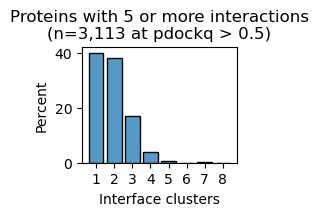

In [28]:
plt.figure(figsize=(2, 1.5))
sns.histplot(data=df_ifcluster_stats, x='bait_cluster_count', discrete=True, stat='percent', shrink=.8)
plt.title(f'Proteins with 5 or more interactions\n(n={uf(len(df_interfaces))} at pdockq > 0.5)')
plt.gca().set_xlabel('Interface clusters')
plt.gca().set_xticks([1, 2, 3, 4, 5, 6, 7, 8,])
plt.savefig('interface_clusters_counts_.svg', bbox_inches='tight', transparent=True)

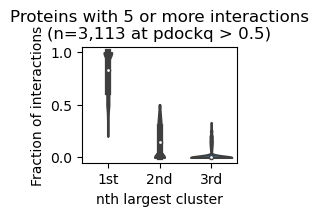

In [29]:
plt.figure(figsize=(2, 1.5))
sns.violinplot(data=df_ifcluster_stats[['bait_frac_cluster1', 'bait_frac_cluster2', 'bait_frac_cluster3']].rename({
    'bait_frac_cluster1': '1st',
    'bait_frac_cluster2': '2nd',
    'bait_frac_cluster3': '3rd',
}, axis=1), cut=0, color='tab:blue')
plt.title(f'Proteins with 5 or more interactions\n(n={uf(len(df_interfaces))} at pdockq > 0.5)')
plt.gca().set_xlabel('nth largest cluster')
plt.gca().set_ylabel('Fraction of interactions')
plt.savefig('interface_clusters_sizes_.svg', bbox_inches='tight', transparent=True)